# 1 Notebook setup

## 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import tree, metrics, preprocessing
from IPython import display
from category_encoders import ordinal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 2 Load data

We start by importing the sample dataset and getting familiar with the basic content

In [2]:
# Base training set for benchmarking
base_train = pd.read_csv('nursery_dataset and R code/original_training_set_no_na.csv', usecols=lambda x: x != "Unnamed: 0")

# Base testing set to be used across all datasets
base_test = pd.read_csv('nursery_dataset and R code/original_testing_set_no_na.csv', usecols=lambda x: x != "Unnamed: 0")

# Baseline mode imputation datasets
mode_10 = pd.read_csv('nursery_dataset and R code/mode_imputation_10.csv', usecols=lambda x: x != "Unnamed: 0")
mode_40 = pd.read_csv('nursery_dataset and R code/mode_imputation_40.csv', usecols=lambda x: x != "Unnamed: 0")
mode_70 = pd.read_csv('nursery_dataset and R code/mode_imputation_70.csv', usecols=lambda x: x != "Unnamed: 0")

# Naive Bayes imputation datasets
nb_10 = pd.read_csv('nursery_dataset and R code/nb_imputation_10.csv', usecols=lambda x: x != "Unnamed: 0")
nb_40 = pd.read_csv('nursery_dataset and R code/nb_imputation_40.csv', usecols=lambda x: x != "Unnamed: 0")
nb_70 = pd.read_csv('nursery_dataset and R code/nb_imputation_70.csv', usecols=lambda x: x != "Unnamed: 0")

Check that all the data has been loaded successfully

In [3]:
tables_list = [base_train, base_test, mode_10, mode_40, mode_70, nb_10, nb_40, nb_70]
for table in tables_list:
    display.display(table.head())

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,3,convenient,convenient,nonprob,recommended,very_recom
1,usual,critical,completed,1,critical,inconv,nonprob,priority,spec_prior
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,recommended,priority
4,pretentious,critical,completed,more,less_conv,inconv,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
3,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority
4,usual,proper,complete,1,convenient,inconv,slightly_prob,recommended,very_recom


,parents,has_nurs,form,children,housing,finance,social,health,class
0,great_pret,proper,complete,3,convenient,convenient,nonprob,priority,very_recom
1,usual,critical,completed,1,critical,inconv,nonprob,priority,priority
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,recommended,priority
4,pretentious,critical,incomplete,more,less_conv,inconv,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,critical,completed,3,critical,convenient,slightly_prob,recommended,very_recom
1,pretentious,critical,completed,3,critical,inconv,slightly_prob,priority,not_recom
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,priority,priority
4,pretentious,critical,completed,3,less_conv,convenient,slightly_prob,priority,not_recom


,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,very_crit,complete,more,convenient,inconv,nonprob,priority,priority
1,pretentious,very_crit,complete,more,less_conv,inconv,nonprob,priority,priority
2,pretentious,very_crit,complete,more,less_conv,convenient,slightly_prob,not_recom,priority
3,pretentious,very_crit,complete,more,less_conv,inconv,slightly_prob,priority,priority
4,pretentious,critical,complete,more,less_conv,inconv,problematic,priority,priority


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,3,convenient,convenient,nonprob,recommended,very_recom
1,usual,critical,completed,1,critical,inconv,nonprob,priority,spec_prior
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,recommended,priority
4,pretentious,critical,foster,more,less_conv,inconv,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,incomplete,2,convenient,convenient,nonprob,recommended,very_recom
1,usual,proper,incomplete,2,critical,inconv,problematic,priority,priority
2,pretentious,improper,complete,2,convenient,inconv,nonprob,not_recom,not_recom
3,usual,proper,foster,1,convenient,inconv,slightly_prob,priority,priority
4,great_pret,very_crit,completed,more,less_conv,convenient,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,great_pret,improper,completed,more,convenient,inconv,nonprob,recommended,recommended
1,great_pret,improper,complete,more,critical,inconv,nonprob,recommended,recommended
2,pretentious,critical,incomplete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,complete,2,convenient,inconv,problematic,recommended,priority
4,pretentious,critical,incomplete,3,critical,inconv,problematic,not_recom,not_recom


In [4]:
for table in tables_list:
    table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   9072 non-null   object
 1   has_nurs  9072 non-null   object
 2   form      9072 non-null   object
 3   children  9072 non-null   object
 4   housing   9072 non-null   object
 5   finance   9072 non-null   object
 6   social    9072 non-null   object
 7   health    9072 non-null   object
 8   class     9072 non-null   object
dtypes: object(9)
memory usage: 638.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   3888 non-null   object
 1   has_nurs  3888 non-null   object
 2   form      3888 non-null   object
 3   children  3888 non-null   object
 4   housing   3888 non-null   object
 5   finance   3888 non-null   object
 6   social    3888 non-

Categorical values need to be encoded for the `DecisionTreeClassifier` in scikit-learn.

In [12]:
# Check column labels
for col in nb_40.columns:
    print(col, ':', nb_40[col].unique())

parents : [3 2 1]
has_nurs : [4 2 5 1 3]
form : [4 1 3 2]
children : [2 1 4 3]
housing : [1 2 3]
finance : [1 2]
social : [1 2 3]
health : [3 2 1]
class : ['very_recom' 'priority' 'not_recom' 'spec_prior' 'recommend']


In [6]:
# Create mappings per column
parents_mapping = {
    'great_pret': 1,
    'pretentious': 2,
    'usual': 3
}
parents_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'parents', 'mapping': parents_mapping}])

nurs_mapping = {
    'critical': 1,
    'improper': 2,
    'less_proper': 3,
    'proper': 4,
    'very_crit': 5
}
nurs_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'has_nurs', 'mapping': nurs_mapping}])

form_mapping = {
    'complete': 1,
    'completed': 2,
    'foster': 3,
    'incomplete': 4,
}
form_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'form', 'mapping': form_mapping}])

children_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    'more': 4,
}
children_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'children', 'mapping': children_mapping}])

housing_mapping = {
    'convenient': 1,
    'critical': 2,
    'less_conv': 3,
}
housing_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'housing', 'mapping': housing_mapping}])

finance_mapping = {
    'convenient': 1,
    'inconv': 2,
}
finance_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'finance', 'mapping': finance_mapping}])

social_mapping = {
    'nonprob': 1,
    'problematic': 2,
    'slightly_prob': 3
}
social_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'social', 'mapping': social_mapping}])

health_mapping = {
    'not_recom': 1,
    'priority': 2,
    'recommended': 3
}
health_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'health', 'mapping': health_mapping}])

class_mapping = {
    'not_recom': 1,
    'priority': 2,
    'recommended': 3,
    'spec_prior': 4,
    'very_recom': 5
}
class_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'class', 'mapping': class_mapping}])

In [7]:
for table in tables_list:
    table[['parents']] = parents_encode.fit_transform(table[['parents']])
    table[['has_nurs']] = nurs_encode.fit_transform(table[['has_nurs']])
    table[['form']] = form_encode.fit_transform(table[['form']])
    table[['children']] = children_encode.fit_transform(table[['children']])
    table[['housing']] = housing_encode.fit_transform(table[['housing']])
    table[['finance']] = finance_encode.fit_transform(table[['finance']])
    table[['social']] = social_encode.fit_transform(table[['social']])
    table[['health']] = health_encode.fit_transform(table[['health']])

Train the base model, and use the test dataset to determine the optimal tree depth.

In [8]:
# Classification train datasets
base_train_X = base_train.drop(['class'], axis=1)
base_train_y = base_train['class']
mode_10_X = mode_10.drop(['class'], axis=1)
mode_10_y = mode_10['class']
mode_40_X = mode_40.drop(['class'], axis=1)
mode_40_y = mode_40['class']
mode_70_X = mode_70.drop(['class'], axis=1)
mode_70_y = mode_70['class']
nb_10_X = nb_10.drop(['class'], axis=1)
nb_10_y = nb_10['class']
nb_40_X = nb_40.drop(['class'], axis=1)
nb_40_y = nb_40['class']
nb_70_X = nb_70.drop(['class'], axis=1)
nb_70_y = nb_70['class']

# Classification test dataset
base_test_X = base_test.drop(['class'], axis=1)
base_test_y = base_test['class']

Confusion Matrix for Training at Tree Depth 4.
[[2998    0    0    0    0]
 [   0 2445    0  533    0]
 [   0    2    0    0    0]
 [   0  540    0 2331    0]
 [   0  223    0    0    0]]
Confusion Matrix for Testing at Tree Depth 4.
[[1322    0    0    0]
 [   0 1077  211    0]
 [   0  216  957    0]
 [   0  105    0    0]]
Confusion Matrix for Training at Tree Depth 5.
[[2998    0    0    0    0]
 [   0 2384    0  594    0]
 [   0    2    0    0    0]
 [   0  306    0 2565    0]
 [   0  223    0    0    0]]
Confusion Matrix for Testing at Tree Depth 5.
[[1322    0    0    0]
 [   0 1039  249    0]
 [   0  117 1056    0]
 [   0  105    0    0]]
Confusion Matrix for Training at Tree Depth 6.
[[2998    0    0    0    0]
 [   0 2569    0  409    0]
 [   0    2    0    0    0]
 [   0  332    0 2539    0]
 [   0  223    0    0    0]]
Confusion Matrix for Testing at Tree Depth 6.
[[1322    0    0    0]
 [   0 1104  184    0]
 [   0  147 1026    0]
 [   0  105    0    0]]
Confusion Matrix fo

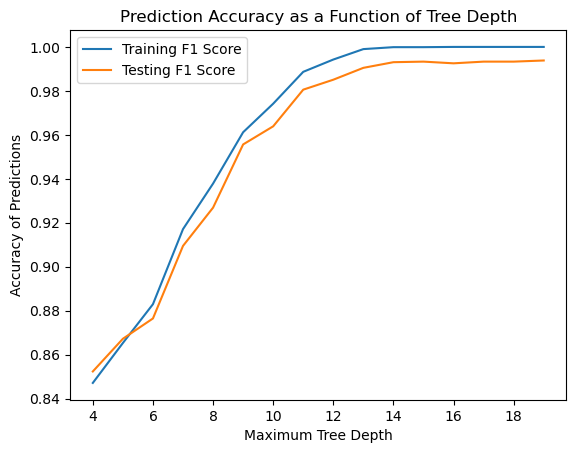

In [9]:
# Initialize lists on first iteration
train_base_accuracy = []
train_base_sensitivity = []
train_base_recall = []
train_base_f1 = []
test_base_accuracy = []
test_base_sensitivity = []
test_base_recall = []
test_base_f1 = []
max_tree_depth = []

for max_depth in range(4, 20): 

    # Train the tree with the selected max_depth
    dt_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt_classifier_fit = dt_classifier.fit(base_train_X, base_train_y)

    # Make predictions with the fitted tree
    base_train_y_pred = dt_classifier_fit.predict(base_train_X)
    base_test_y_pred = dt_classifier_fit.predict(base_test_X)

    # Calculate train performance metrics
    train_base_accuracy.append(metrics.accuracy_score(base_train_y, base_train_y_pred))
    train_base_sensitivity.append(metrics.precision_score(base_train_y, base_train_y_pred, average='weighted', zero_division=0))
    train_base_recall.append(metrics.recall_score(base_train_y, base_train_y_pred, average='weighted', zero_division=0))
    train_base_f1.append(metrics.f1_score(base_train_y, base_train_y_pred, average='weighted', zero_division=0))

    # Calculate train performance metrics
    test_base_accuracy.append(metrics.accuracy_score(base_test_y, base_test_y_pred))
    test_base_sensitivity.append(metrics.precision_score(base_test_y, base_test_y_pred, average='weighted', zero_division=0))
    test_base_recall.append(metrics.recall_score(base_test_y, base_test_y_pred, average='weighted', zero_division=0))
    test_base_f1.append(metrics.f1_score(base_test_y, base_test_y_pred, average='weighted', zero_division=0))

    # Keep track of max_depth level
    max_tree_depth.append(max_depth)

    # View confusion matrix
    print(f'Confusion Matrix for Training at Tree Depth {max_depth}.')
    print(confusion_matrix(base_train_y, base_train_y_pred))
    print(f'Confusion Matrix for Testing at Tree Depth {max_depth}.')
    print(confusion_matrix(base_test_y, base_test_y_pred))

#plt.plot(max_tree_depth, train_base_accuracy, label='Training Accuracy')
#plt.plot(max_tree_depth, test_base_accuracy, label='Testing Accuracy')
#plt.plot(max_tree_depth, train_base_sensitivity, label='Training Sensitivity')
#plt.plot(max_tree_depth, test_base_sensitivity, label='Testing Sensitivity')
#plt.plot(max_tree_depth, train_base_recall, label='Training Recall')
#plt.plot(max_tree_depth, test_base_recall, label='Testing Recall')
plt.plot(max_tree_depth, train_base_f1, label='Training F1 Score')
plt.plot(max_tree_depth, test_base_f1, label='Testing F1 Score')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy of Predictions')
plt.title('Prediction Accuracy as a Function of Tree Depth')
plt.legend()
plt.show()


The testing does not decrease as the table overfits...

Since the performance seems to equalise at tree depth = 11, we shall use that in further testing

In [10]:
train_X_tables = [base_train_X, mode_10_X, nb_10_X, mode_40_X, nb_40_X, mode_70_X, nb_70_X]
train_y_tables = [base_train_y, mode_10_y, nb_10_y, mode_40_y, nb_40_y, mode_70_y, nb_70_y]

base_train table.
Test Accuracy = 0.9801954732510288
Test Sensitivity = 0.9809786699583894
Test Recall = 0.9801954732510288
Test F1 Score = 0.9805592475432644
Confusion Matrix for base_train table.
[[1322    0    0    0    0]
 [   0 1242    0   35   11]
 [   0    0    0    0    0]
 [   0   20    0 1153    0]
 [   0    8    3    0   94]]
--------------------------------------------
mode_10 table.
Test Accuracy = 0.9295267489711934
Test Sensitivity = 0.9317336769865568
Test Recall = 0.9295267489711934
Test F1 Score = 0.9297150316668139
Confusion Matrix for mode_10 table.
[[1322    0    0    0    0]
 [   4 1199    0   53   32]
 [   0    0    0    0    0]
 [  18  140    0 1013    2]
 [   0   23    2    0   80]]
--------------------------------------------
nb_10 table.
Test Accuracy = 0.9683641975308642
Test Sensitivity = 0.9685665305143626
Test Recall = 0.9683641975308642
Test F1 Score = 0.9673674606550163
Confusion Matrix for nb_10 table.
[[1312    1    9    0]
 [   1 1251   34    2]
 [  

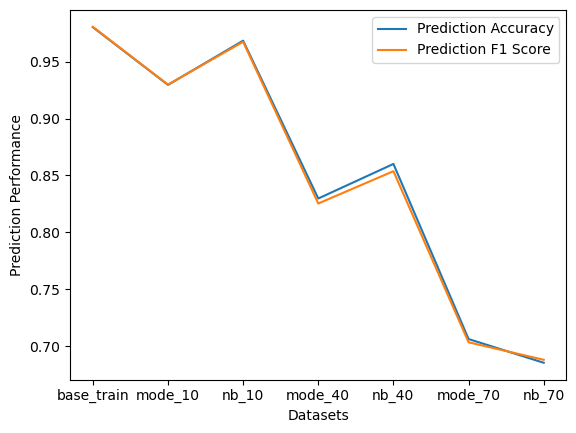

In [11]:
# Initialize lists on first iteration
test_accuracy = []
test_sensitivity = []
test_recall = []
test_f1 = []
depth_dt_clas_outlier = []
iter = 0

for train_X, train_y in zip(train_X_tables, train_y_tables): 

    # Train the tree with the selected max_depth
    dt_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)
    dt_classifier_fit = dt_classifier.fit(train_X, base_train_y)

    # Make predictions with the fitted tree
    test_y_pred = dt_classifier_fit.predict(base_test_X)

    # Calculate test performance metrics
    test_accuracy.append(metrics.accuracy_score(base_test_y, test_y_pred))
    test_sensitivity.append(metrics.precision_score(base_test_y, test_y_pred, average='weighted', zero_division=1))
    test_recall.append(metrics.recall_score(base_test_y, test_y_pred, average='weighted', zero_division=1))
    test_f1.append(metrics.f1_score(base_test_y, test_y_pred, average='weighted', zero_division=1))

    # Keep track of max_depth level
    max_tree_depth.append(max_depth)

    # View confusion matrix
    if iter == 0:
        print('base_train table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for base_train table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')
    elif iter == 1:
        print('mode_10 table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for mode_10 table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')
    elif iter == 2:
        print('nb_10 table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for nb_10 table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')
    elif iter == 3:
        print('mode_40 table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for mode_40 table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')
    elif iter == 4:
        print('nb_40 table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for nb_40 table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')
    elif iter == 5:
        print('mode_70 table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for mode_70 table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')
    elif iter == 6:
        print('nb_70 table.')
        print(f'Test Accuracy = {test_accuracy[iter]}')
        print(f'Test Sensitivity = {test_sensitivity[iter]}')
        print(f'Test Recall = {test_recall[iter]}')
        print(f'Test F1 Score = {test_f1[iter]}')
        print('Confusion Matrix for nb_70 table.')
        print(confusion_matrix(base_test_y, test_y_pred))
        print(f'--------------------------------------------')

    iter += 1
    

Plot_Label_List = ['base_train', 'mode_10', 'nb_10', 'mode_40', 'nb_40', 'mode_70', 'nb_70']
plt.plot(Plot_Label_List, test_accuracy, label='Prediction Accuracy')
#plt.plot(Plot_Label_List, test_sensitivity, label='Prediction Precision')
#plt.plot(Plot_Label_List, test_recall, label='Prediction Recall')
plt.plot(Plot_Label_List, test_f1, label='Prediction F1 Score')
plt.xlabel('Datasets')
plt.ylabel('Prediction Performance')
plt.legend()
plt.show()
